In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'June 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14
2017-03-31     2590   2283        284  426    0    11    157     298      11
2017-04-30     1890   2390        243  395    0    10    123     260      31
2017-05-31     2006   2584        110  389    0     4    106     221      29
2017-06-30     2048   2164        154  407    0     7    137     182      24

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-06-30       42   -420         44  18   0     3     31     -39      -5

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

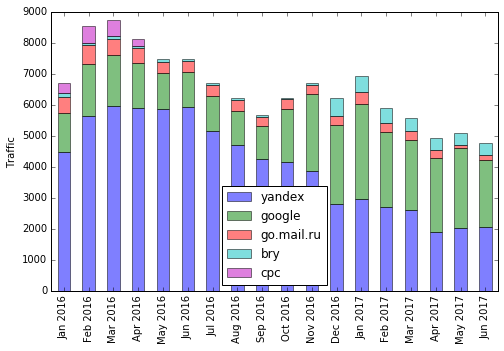

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

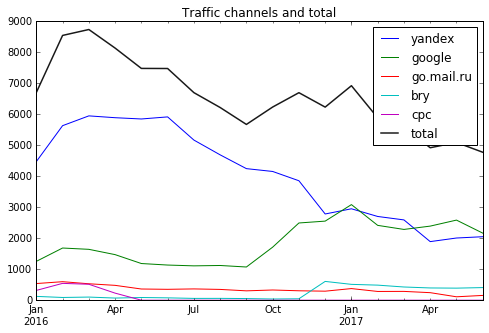

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing   0                       двери с доставкой и установкой     20
       1                                    двери белорусские     18
       2                                         двери книжка     17
       3                                   двери с фурнитурой     17
       4                                       двери недорого     14
       5                         межкомнатные двери с замками     14
       6                                       двери под ключ     13
       7                                дешевые входные двери     13
       8                                          двери верда     12
       9                                     двери со скидкой     12
       10                                  двери межкомнатные     11
       11                                 двери эмалированные     11
       12                                         двери эмаль     10
       13                             интернет магазин дверей     10
       14                                      двери складные      9
       15                                     двери в наличии      8
       16                                         двери венге      8
       17                                      двери гармошка      7
       18                                          двери купе      7
       19                                   двери с капителью      7
       20                            установка входных дверей      7
       21                              входные двери недорого      6
       22                                      двери в ванную      6
       23                           двери ульяновские каталог      6
       24                                        двери эконом      6
       25              ульяновские двери межкомнатные каталог      6
       26                                   арки межкомнатные      5
       27                             входные двери с замками      5
       28                                   двери беленый дуб      5
       29                           ламинированные двери цена      5
...                                                       ...    ...
yandex 569                      сириус патина дверное полотно      1
       570                  складные дверные системы гармошка      1
       571                       сколько стоят двери на кухню      1
       572     старая дверь на кухне со стеклом как покрасить      1
       573                         стеклянная дверь для кухни      1
       574                    стеклянная дверь для кухни фото      1
       575                  стеклянное дверное полотно купить      1
       576  толщина дверного полотна межкомнатной двери 40 мм      1
       577                     толщина полотна двери циркон 1      1
       578                 толщина полотна межкомнатной двери      1
       579    установить в старый дверной проем новое полотно      1
       580  установка роликов eclisse unico single на двер...      1
       581             фабрика дверная линия магазин в москве      1
       582  фасадные двери для кухни купить в москве в лер...      1
       583                         фотографии кухонных дверей      1
       584                        фрамуга над кухонной дверью      1
       585          фурнитура к дверным полотнам для санузлов      1
       586  хочу вставить одно стекло в двери на кухне сам...      1
       587                               цвет дверных полотен      1
       588                              цвета дверных полотен      2
       589                        чем покрыть дверное полотно      1
       590                          что такое дверная полотна      1
       591                            что такое полотно двери      1
       592                            что такое полотно двери      1
       593                            что такое полотно двери      1
       594                          что такое полотно дверное      1
       595                            ширина дверног

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери с доставкой и установкой,20
go.mail.ru,(not set),153
google,np - /?cnt=catalog&r=2438,238
rambler,двери с установкой дешево,7
yahoo,np - /,2
yandex,(not set),1305


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                     двери с доставкой и установкой     20
           1                                  двери белорусские     18
           2                                       двери книжка     17
           3                                 двери с фурнитурой     17
           4                                     двери недорого     14
go.mail.ru 0                                          (not set)    153
           1             купить межкомнатные двери с установкой      1
google     0                          np - /?cnt=catalog&r=2438    238
           1                          np - /?cnt=catalog&r=1428    168
           2                                             np - /    102
           3                                   np - /?pid=pokaz     54
           4                             дверные полотна купить     39
rambler    0                          двери с установкой дешево      7
           1                           доборы дуб неаполь verda      2
           2                                 доборы дуб неаполь      1
           3                           доборы дуб неаполь verde      1
           4                    межкомнатные двери с установкой      1
yahoo      0                                             np - /      2
           1                          np - /?cnt=catalog&r=1428      2
           2                                   np - /?pid=pokaz      2
           3                          np - /?cnt=catalog&r=2041      1
           4                          np - /?cnt=catalog&r=2438      1
yandex     0                                          (not set)   1305
           1  межкомнатные двери недорого с установкой под ключ     43
           2                                       took-took.ru     19
           3           межкомнатные двери недорого с установкой     11
           4  межкомнатные двери недорого с установкой под к...     10